In [1]:
import sys
sys.path.insert(1, '/Users/ethanfuerst/Documents/Coding/nba-figures')
import pandas as pd
import numpy as np
import datetime
import html5lib
from nba_season import NBASeason
from nba_methods import SeasonNotFoundError
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from textwrap import wrap

'''
I created this on 12/26/19.
My findings can be found in this post on my data exploration blog:
https://www.tidbitstatistics.com/NBA-blowouts/
I've added in the enddate parameter to run the script from a certain date
Also, when I created this I wasn't that familiar with matplotlib so some of my logic here might be a little weird.
'''


"\nI created this on 12/26/19.\nMy findings can be found in this post on my data exploration blog:\nhttps://www.tidbitstatistics.com/NBA-blowouts/\nI've added in the enddate parameter to run the script from a certain date\nAlso, when I created this I wasn't that familiar with matplotlib so some of my logic here might be a little weird.\n"

In [2]:
def thres_games(startyear=2000, endyear=datetime.datetime.today().year - 1, thres = 40, enddate=None):
    '''
    Returns a df detailing the number of games won by a number >= the threshold specified.

    Parameters:


    startyear (int, default: 2001)
        The first season that you want to be in the df.
            ex. 2015

    endyear (int, default: current year - 1)
        The last season that you want to be in the df.
            ex. 2019
    
    thres (int, default: 40)
        The margin of victory threshold for the df.
            ex. 30
    
    enddate (string, default: None)
        Filter all games <= certain date
            ex. '2019-12-26'

    Returns:

    df
        A pd.DataFrame() containing the season data with the following columns:
            ['Season', 'Count', 'Game Nums', 'Projected']
            'Count' is the number of games over thres.
            'Projected' is for current seasons in play only.
    '''

    # - Need to make sure that startyear, endyear and thres are all integers
    try:
        startyear = int(startyear)
        endyear = int(endyear)
        thres = int(thres)
    except:
        # - This is probably because they inputted a string for season, and we need an int
        raise TypeError("Wrong variable type for startyear, endyear or thres. Integer expected.")
    # - Need to check that endyear season exists
    try:
        # - If there is data for endyear, we are good.
        NBASeason(endyear)
    except:
        # - If we can't get data from endyear, then raise SeasonNotFoundError
        raise SeasonNotFoundError("There is no data for the " + str(endyear) + " season yet.")

    years = [i for i in range(startyear, endyear + 1)]
    tot = []
    for i in years:
        curr_season = NBASeason(i)
        year = curr_season.get_season()
        if enddate is not None:
            year = year[year['Date'] <= enddate]
        num_games = len(year)
        season = "'" +str(i)[2:] + " - '" + str(i + 1)[2:]
        game_nums = list(year[year['MOV'] >= thres].index + 1)
        year = year[year['MOV'] >= thres].copy()
        count = len(year)
        Projected = int(((count / num_games) * 1230) - count)
        tot.append([season, count, game_nums, Projected])
    
    return pd.DataFrame(tot, columns=['Season', 'Count', 'Game Nums', 'Projected'])


In [3]:
# 20, 30, 40, 50
curr_season = NBASeason(2019).get_season()
curr_season = curr_season[curr_season['Date'] <= '2019-12-26'].copy()
df_40 = thres_games(startyear = 2015, endyear=2019, thres = 40, enddate='2019-12-26')
df_30 = thres_games(startyear = 2015, endyear=2019, thres = 30, enddate='2019-12-26')
df_20 = thres_games(startyear = 2015, endyear=2019, thres = 20, enddate='2019-12-26')


In [4]:
def autolabel(rects,fsize=10):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=fsize)


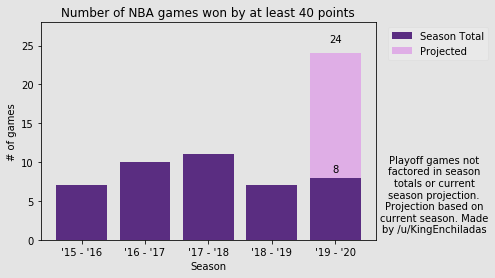

In [5]:
# 40 and proj
fig, ax = plt.subplots(facecolor='#E4E4E4')
fig.patch.set_facecolor('#E4E4E4')
ax.patch.set_facecolor('#E4E4E4')
p1 = plt.bar(df_40['Season'], df_40['Count'], color='#5A2D81')
p2 = plt.bar(df_40['Season'], df_40['Projected'], bottom=df_40['Count'], color='#DFAEE6')
plt.xlabel("Season")
yint = range(0, max(df_40['Projected'] + df_40['Count'])+4, 5)
plt.yticks(yint)
plt.ylabel('# of games')
plt.ylim(top=max(df_40['Projected'] + df_40['Count'])+4)
plt.title('Number of NBA games won by at least 40 points')
plt.legend((p1[0], p2[0]), ('Season Total', 'Projected'), framealpha=0.2, loc='upper right', bbox_to_anchor=(1.35, 1))
fig.text(1.035, .15, '\n'.join(wrap('Playoff games not factored in season totals or current season projection. Projection based on current season. Made by /u/KingEnchiladas', 20)), ha='center')
# fig.set_size_inches(5,7, forward=True)
fig.patch.set_facecolor('#E4E4E4')
height = df_40['Count'].iloc[-1]
ax.text(p1[-1].get_x() + p1[-1].get_width()/2., 1.05*height, '%d' % int(height), ha='center', va='bottom')
height = df_40['Count'].iloc[-1] + df_40['Projected'].iloc[-1]
ax.text(p2[-1].get_x() + p2[-1].get_width()/2., 1.05*height, '%d' % int(height), ha='center', va='bottom')

plt.show()



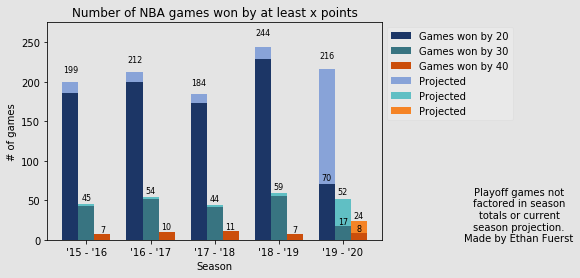

<Figure size 720x432 with 0 Axes>

In [6]:
# Grouped bar
barWidth = 0.25
r1 = np.arange(len(df_20))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

fig, ax = plt.subplots(facecolor='#E4E4E4')
fig.patch.set_facecolor('#E4E4E4')

p1 = ax.bar(r1, df_20['Count'], color='#1C3666', width=barWidth, label='Games won by 20')
p2 = ax.bar(r2, df_30['Count'], color='#387481', width=barWidth, label='Games won by 30')
p3 = ax.bar(r3, df_40['Count'], color='#CB4E0B', width=barWidth, label='Games won by 40')
p4 = ax.bar(r1, df_20['Projected'], bottom=df_20['Count'], color='#88A3D8', width=barWidth, label='Projected')
p5 = ax.bar(r2, df_30['Projected'], bottom=df_30['Count'], color='#60BFC4', width=barWidth, label='Projected')
p6 = ax.bar(r3, df_40['Projected'], bottom=df_40['Count'], color='#F58426', width=barWidth, label='Projected')
ax.patch.set_facecolor('#E4E4E4')
plt.xticks([r + barWidth for r in range(len(df_20))], df_20['Season'])
plt.legend(framealpha=0.2, loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
plt.xlabel("Season")
plt.ylabel('# of games')
plt.ylim(top=275)
plt.title('Number of NBA games won by at least x points')
fig = plt.figure(figsize=(5,7))
for i in [p1,p2,p3]:
    autolabel(i, fsize=8)
height = df_20['Count'].iloc[-1] + df_20['Projected'].iloc[-1]
ax.text(p4[-1].get_x() + p4[-1].get_width()/2., 1.05*height, '%d' % int(height), ha='center', va='bottom', fontsize=8)
height = df_30['Count'].iloc[-1] + df_30['Projected'].iloc[-1]
ax.text(p5[-1].get_x() + p5[-1].get_width()/2., 1.05*height, '%d' % int(height), ha='center', va='bottom', fontsize=8)
height = df_40['Count'].iloc[-1] + df_40['Projected'].iloc[-1]
ax.text(p6[-1].get_x() + p6[-1].get_width()/2., 1.05*height, '%d' % int(height), ha='center', va='bottom', fontsize=8)

ax.text(7, 0, '\n'.join(wrap('Playoff games not factored in season totals or current season projection. Made by Ethan Fuerst', 20)), ha='center', wrap=True)
fig.set_size_inches(10, 6, forward=True)

plt.show()



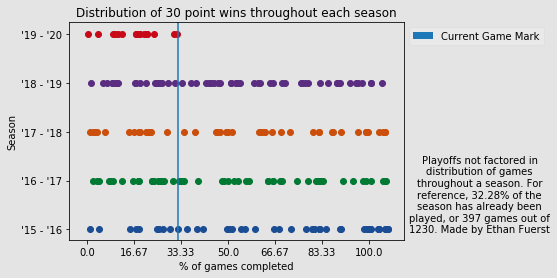

In [7]:
# Dist of 30 point games each season
dist30 = df_30.tail(5).copy()
y = np.arange(len(dist30)) 
fig, ax = plt.subplots(facecolor='#E4E4E4')
fig.patch.set_facecolor('#E4E4E4')
ax.patch.set_facecolor('#E4E4E4')
plt.scatter(dist30['Game Nums'].iloc[0],[y[0] for j in range(len(dist30['Game Nums'].iloc[0]))], color='#1A4D94') 
plt.scatter(dist30['Game Nums'].iloc[1],[y[1] for j in range(len(dist30['Game Nums'].iloc[1]))], color='#007A33') 
plt.scatter(dist30['Game Nums'].iloc[2],[y[2] for j in range(len(dist30['Game Nums'].iloc[2]))], color='#CB4F0A') 
plt.scatter(dist30['Game Nums'].iloc[3],[y[3] for j in range(len(dist30['Game Nums'].iloc[3]))], color='#5A2D81') 
plt.scatter(dist30['Game Nums'].iloc[4],[y[4] for j in range(len(dist30['Game Nums'].iloc[4]))], color='#C80A18')
plt.yticks(y,dist30['Season']) 
plt.xticks([i for i in range(0, 1231, 205)], [round((i/1230) * 100,2) for i in range(0, 1231, 205)])
plt.title('Distribution of 30 point wins throughout each season')
curr_game_mark = len(curr_season)
plt.axvline(x=curr_game_mark)
handles = mpatches.Patch(facecolor='#1D78B7', label='Current Game Mark')
plt.legend(handles=[handles], framealpha=0.2, loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
fig.text(1.075, .15, '\n'.join(wrap('Playoffs not factored in distribution of games throughout a season. For reference, ' + str(round((curr_game_mark/1230) * 100,2)) + '% of the season has already been played, or ' + str(curr_game_mark) + ' games out of 1230. Made by Ethan Fuerst', 30)), ha='center')
plt.xlabel('% of games completed')
plt.ylabel('Season')

plt.show()

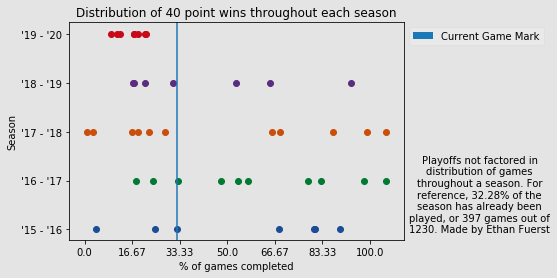

In [8]:
# Dist of 40 point wins each season
dist_40 = df_40.tail(5).copy()
y = np.arange(len(dist_40)) 
fig, ax = plt.subplots(facecolor='#E4E4E4')
fig.patch.set_facecolor('#E4E4E4')
ax.patch.set_facecolor('#E4E4E4')
plt.scatter(dist_40['Game Nums'].iloc[0],[y[0] for j in range(len(dist_40['Game Nums'].iloc[0]))], color='#1A4D94') 
plt.scatter(dist_40['Game Nums'].iloc[1],[y[1] for j in range(len(dist_40['Game Nums'].iloc[1]))], color='#007A33') 
plt.scatter(dist_40['Game Nums'].iloc[2],[y[2] for j in range(len(dist_40['Game Nums'].iloc[2]))], color='#CB4F0A') 
plt.scatter(dist_40['Game Nums'].iloc[3],[y[3] for j in range(len(dist_40['Game Nums'].iloc[3]))], color='#5A2D81') 
plt.scatter(dist_40['Game Nums'].iloc[4],[y[4] for j in range(len(dist_40['Game Nums'].iloc[4]))], color='#C80A18')
plt.yticks(y,dist_40['Season']) 
plt.xticks([i for i in range(0, 1231, 205)], [round((i/1230) * 100,2) for i in range(0, 1231, 205)])
plt.title('Distribution of 40 point wins throughout each season')
curr_game = len(curr_season)
plt.axvline(x=curr_game)
handles = mpatches.Patch(facecolor='#1D78B7', label='Current Game Mark')
plt.legend(handles=[handles], framealpha=0.2, loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
fig.text(1.075, .15, '\n'.join(wrap('Playoffs not factored in distribution of games throughout a season. For reference, ' + str(round((curr_game_mark/1230) * 100,2)) + '% of the season has already been played, or ' + str(curr_game_mark) + ' games out of 1230. Made by Ethan Fuerst', 30)), ha='center')
plt.xlabel('% of games completed')
plt.ylabel('Season')

plt.show()


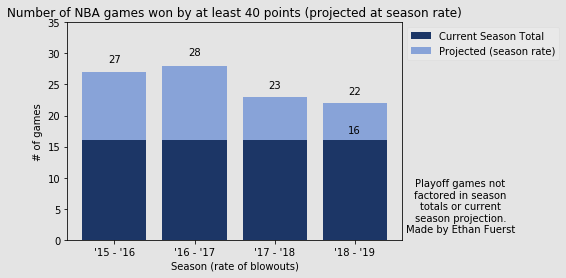

In [9]:
# Proj blowouts by season rate
curr_blowouts = df_40['Projected'].iloc[-1]
tot = []
for i in range(len(df_40) - 1):
    rate = [j < curr_game for j in df_40['Game Nums'].iloc[i]]
    proj_left = int((rate.count(False) / len(rate)) * curr_blowouts)
    tot.append([df_40['Season'].iloc[i], curr_blowouts, proj_left])
    # print(df_40['Season'].iloc[i], proj_total, 'projected total')
df_proj = pd.DataFrame(tot, columns=['Season', 'Current', 'Projected (season rate)'])
fig, ax = plt.subplots(facecolor='#E4E4E4')
fig.patch.set_facecolor('#E4E4E4')
ax.patch.set_facecolor('#E4E4E4')
p1 = plt.bar(df_proj['Season'], df_proj['Current'], color='#1C3666')
p2 = plt.bar(df_proj['Season'], df_proj['Projected (season rate)'], bottom=df_proj['Current'], color='#88A3D8')
plt.xlabel("Season (rate of blowouts)")
yint = range(0, max(df_proj['Projected (season rate)'] + df_proj['Current'])+11, 5)
plt.yticks(yint)
plt.ylabel('# of games')
plt.title('Number of NBA games won by at least 40 points (projected at season rate)')
plt.legend((p1[0], p2[0]), ('Current Season Total', 'Projected (season rate)'), framealpha=0.2, loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
fig.text(1.035, .15, '\n'.join(wrap('Playoff games not factored in season totals or current season projection. Made by Ethan Fuerst', 20)), ha='center')
height = df_proj['Current'].iloc[-1]
ax.text(p1[-1].get_x() + p1[-1].get_width()/2., 1.05*height, '%d' % int(height), ha='center', va='bottom', fontsize=10)
for rect in p2:
        height = rect.get_height() + df_proj['Current'].iloc[-1]
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height), ha='center', va='bottom', fontsize=10)
# fig.set_size_inches(5,7, forward=True)
fig.patch.set_facecolor('#E4E4E4')
# fig = plt.figure(figsize=(5,7))

plt.show()

